# Case study on significant heterogeneity trait

In [1]:
%load_ext lab_black
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import admix
import dapgen
from os.path import join
import admix_genet_cor

In [2]:
df_assoc = []
for trait in ["total_wbc_cnt"]:
    df_assoc.append(pd.read_csv(f"out/locus_hetero/{trait}.csv", index_col=0))
df_assoc = pd.concat(df_assoc).dropna()
df_assoc = df_assoc[df_assoc.HET_pval < 1e-5]
df_assoc = df_assoc[(df_assoc.EUR_af > 0.005) & (df_assoc.AFR_af > 0.005)].reset_index(
    drop=True
)

In [3]:
df_assoc.groupby(["trait_id", "REGION"]).min(["assoc_pval", "HET_pval"])

CHR_ID    CHR_POS        P-VALUE    EUR_af    AFR_af  \
trait_id      REGION                                                         
total_wbc_cnt 1p13.1       1  115630459   3.000000e-12  0.031613  0.665952   
              1p13.2       1  111820023   2.000000e-07  0.056683  0.612460   
              1q21.2       1  147588715   2.000000e-27  0.889040  0.133103   
              1q21.3       1  150602219   2.000000e-18  0.074574  0.406109   
              1q23.1       1  159092646  1.000000e-130  0.011479  0.794816   
              1q23.2       1  159205095   1.000000e-28  0.110969  0.237900   
              1q23.3       1  161043331   2.000000e-61  0.020884  0.151523   

                         assoc_pval       HET_pval  EUR_beta  AFR_beta  \
trait_id      REGION                                                     
total_wbc_cnt 1p13.1   1.818608e-32   2.034134e-17 -0.004484  0.272866   
              1p13.2   1.917093e-11   4.040046e-09 -0.038866  0.198910   
              1q21.2   1.759031e-45   8.840271e-14 -0.261816  0.070880   
              1q21.3   9.215751e-30   1.751948e-40 -0.071917  0.305017   
              1q23.1  2.140118e-176   1.033909e-15 -0.006795  0.600564   
              1q23.2   4.917879e-84  3.508727e-201 -0.678589  0.022608   
              1q23.3   2.916198e-68   3.104250e-73 -0.379751  0.108740   

                      EUR_beta_stderr  AFR_beta_stderr  
trait_id      REGION                                    
total_wbc_cnt 1p13.1         0.027315         0.021249  
              1p13.2         0.035301         0.022715  
              1q21.2         0.017162         0.045210  
              1q21.3         0.026673         0.022386  
              1q23.1         0.073814         0.019934  
              1q23.2         0.025666         0.030721  
              1q23.3         0.016857         0.020578

In [ ]:
159204893

In [4]:
PFILE_DIR = "/u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/imputed"
SAMPLE_INFO_PATH = "/u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/sample_info.txt"

In [5]:
trait = "total_wbc_cnt"

dset = admix.dataset.read_dataset(
    join(PFILE_DIR, "chr1"),
    indiv_info=SAMPLE_INFO_PATH,
    n_anc=2,
)

dset = dset[:, ~np.isnan(dset.indiv[trait]).values]
dset = dset[:, (dset.indiv.study == "WHI").values]
covar_cols = ["age", "sex", "study"] + [f"geno_EV{i}" for i in range(1, 11)]

df_pheno = dset.indiv[[trait]].copy()
df_covar = dset.indiv[covar_cols].copy()
# create study dummies variables
study_dummies = pd.get_dummies(df_covar["study"], drop_first=True)
study_dummies.columns = [f"study_dummy_{s}" for s in study_dummies.columns]
df_covar = pd.concat([df_covar, study_dummies], axis=1)
df_covar = df_covar.drop(columns=["study"])

for col in df_pheno.columns:
    df_pheno[col] = admix.data.quantile_normalize(df_pheno[col])

for col in df_covar.columns:
    df_covar[col] = admix.data.quantile_normalize(df_covar[col])

In [25]:
np.argmin(np.abs(dset.snp.POS - 159204893))

785041

In [33]:
dset.snp.CHROM

snp
chr1:782520:T:C       1
chr1:786325:A:G       1
chr1:805145:G:A       1
chr1:809277:C:T       1
chr1:844364:T:G       1
                     ..
chr1:247770229:A:C    1
chr1:247770270:C:A    1
chr1:247770277:T:C    1
chr1:247770421:A:G    1
chr1:247770525:G:T    1
Name: CHROM, Length: 1340372, dtype: int64

In [34]:
dset[785041].lanc.sum(axis=[0, 2]).compute()

array([0, 1, 0, ..., 1, 1, 1])

In [31]:
np.mean(dset[785041].lanc.sum(axis=[0, 2]).compute() == lanc[9])

1.0

In [6]:
dset_subset = dset[(dset.snp.POS.isin(df_assoc.CHR_POS)).values]
dset_subset.persist()

In [7]:
apa = dset_subset.allele_per_anc().compute()
af = dset_subset.af_per_anc()
lanc = dset_subset.lanc.sum(axis=2).compute()

In [22]:
159204893

159204893

In [23]:
dset_subset.snp.index.get_loc("chr1:159205095:T:C")

9

In [24]:
np.mean(lanc[9] == lanc[8])

0.9879482219907751

In [15]:
lanc[7:10, :]

array([[0, 1, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 1]])

In [13]:
lanc.shape

(17, 6721)

In [ ]:
159092646

In [12]:
dset_subset.snp.index.get_loc("chr1:159092646:G:A")

8

In [ ]:
import statsmodels.api as sm

In [53]:
for snp_i in range(dset_subset.n_snp):

    # without conditioning on local ancestry
    p_het1, model_het = admix_genet_cor.test_snp_het(
        apa[snp_i, :, :], df_pheno.values, df_covar.values
    )

    p_assoc1, model_assoc = admix_genet_cor.test_snp_assoc(
        apa[snp_i, :, :], df_pheno.values, df_covar.values
    )

    # conditioning on local ancestry

    p_het2, model_het = admix_genet_cor.test_snp_het(
        apa[snp_i, :, :],
        df_pheno.values,
        np.concatenate([df_covar.values, lanc[[snp_i], :].T], axis=1),
    )

    p_assoc2, model_assoc = admix_genet_cor.test_snp_assoc(
        apa[snp_i, :, :],
        df_pheno.values,
        np.concatenate([df_covar.values, lanc[[snp_i], :].T], axis=1),
    )
    print(f"=========snp_i: {snp_i}==========")
    print(f"p_het1: {p_het1:.3g}, p_het2: {p_het2:.3g}")
    print(f"p_assoc1: {p_assoc1:.3g}, p_assoc2: {p_assoc2:.3g}")

=========snp_i: 0==========
p_het1: 1.23e-08, p_het2: 0.876
p_assoc1: 5.78e-10, p_assoc2: 0.325
=========snp_i: 1==========
p_het1: 2.9e-13, p_het2: 0.26
p_assoc1: 2.64e-18, p_assoc2: 0.893
=========snp_i: 2==========
p_het1: 4.22e-06, p_het2: 0.856
p_assoc1: 3.69e-28, p_assoc2: 0.239
=========snp_i: 3==========
p_het1: 6.24e-15, p_het2: 0.53
p_assoc1: 1.43e-42, p_assoc2: 0.196
=========snp_i: 4==========
p_het1: 7.91e-17, p_het2: 0.174
p_assoc1: 5.51e-18, p_assoc2: 0.412
=========snp_i: 5==========
p_het1: 1.78e-18, p_het2: 0.547
p_assoc1: 3.73e-15, p_assoc2: 0.89
=========snp_i: 6==========
p_het1: 4.64e-20, p_het2: 0.882
p_assoc1: 3.04e-12, p_assoc2: 0.174
=========snp_i: 7==========
p_het1: 4.27e-30, p_het2: 0.832
p_assoc1: 6.08e-26, p_assoc2: 0.395
=========snp_i: 8==========
p_het1: 3.72e-13, p_het2: 0.886
p_assoc1: 5.32e-148, p_assoc2: 0.821
=========snp_i: 9==========
p_het1: 1.14e-37, p_het2: 0.769
p_assoc1: 1.33e-08, p_assoc2: 0.0679
=========snp_i: 10==========
p_het1: 5.03e

In [61]:
snp_i = 10

In [63]:
df_plot = df_pheno.copy()
df_plot["lanc"] = dset_subset[snp_i].lanc.sum(axis=2).compute().flatten()
df_plot["geno"] = dset_subset[snp_i].geno.sum(axis=2).compute().flatten()
df_plot[["AFR", "EUR"]] = apa[snp_i, :, :]

In [64]:
df_plot.corr()

,total_wbc_cnt,lanc,geno,AFR,EUR
total_wbc_cnt,1.000000,0.394212,-0.239253,-0.394865,0.297634
lanc,0.394212,1.000000,-0.611638,-0.998634,0.747199
geno,-0.239253,-0.611638,1.000000,0.614651,0.066191
AFR,-0.394865,-0.998634,0.614651,1.000000,-0.746385
EUR,0.297634,0.747199,0.066191,-0.746385,1.000000


In [55]:
from scipy.stats import pearsonr

In [80]:
print(pearsonr(df_plot.total_wbc_cnt, df_plot.lanc)[0] ** 2)

0.15540287252146487


In [68]:
print(pearsonr(df_plot.loc[eur_indiv, "geno"], df_plot.loc[eur_indiv, trait]))
print(pearsonr(df_plot.loc[afr_indiv, "geno"], df_plot.loc[afr_indiv, trait]))

(-0.015240938975652226, 0.7471279927616673)
(0.01826293888394753, 0.23651485838837516)


In [61]:
dset_snp

admix.Dataset object with n_snp x n_indiv = 1 x 6721, n_anc=2
	snp: 'CHROM', 'POS', 'REF', 'ALT', 'FILTER', 'INFO'
	indiv: 'SEX', 'study', 'age', 'sex', 'race_ethnicity', 'center', 'geno_EV1', 'geno_EV2', 'geno_EV3', 'geno_EV4', 'geno_EV5', 'geno_EV6', 'geno_EV7', 'geno_EV8', 'geno_EV9', 'geno_EV10', 'geno_EV11', 'geno_EV12', 'geno_EV13', 'geno_EV14', 'geno_EV15', 'geno_EV16', 'geno_EV17', 'geno_EV18', 'geno_EV19', 'geno_EV20', 'geno_EV21', 'geno_EV22', 'geno_EV23', 'geno_EV24', 'geno_EV25', 'geno_EV26', 'geno_EV27', 'geno_EV28', 'geno_EV29', 'geno_EV30', 'geno_EV31', 'geno_EV32', 'geno_EV33', 'geno_EV34', 'geno_EV35', 'geno_EV36', 'geno_EV37', 'geno_EV38', 'geno_EV39', 'geno_EV40', 'geno_EV41', 'geno_EV42', 'geno_EV43', 'geno_EV44', 'geno_EV45', 'geno_EV46', 'geno_EV47', 'geno_EV48', 'geno_EV49', 'geno_EV50', 'crp', 'total_wbc_cnt', 'mean_corp_hgb_conc', 'platelet_cnt', 'hdl', 'ldl', 'triglycerides', 'total_cholesterol', 'cigs_per_day_excl_nonsmk_updated', 'coffee_cup_day', 'a1c', 'in

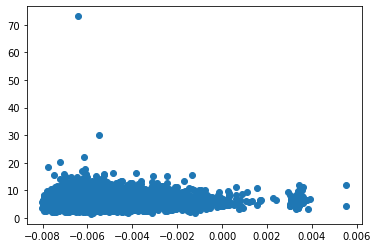

In [45]:
plt.scatter(dset.indiv["geno_EV1"], dset.indiv.total_wbc_cnt)